# Proyecto: Recomendador de Repositorios de Github
## Ortega Manuel 15111304 Edgar Chavez 16110175
## Usaremos Collaborative Filtering

Una de las herramientas más conocidas y utilizadas actualmente que aportó el Machine Learning son los sistemas de recomendación.Estas herramientas muy efectivas de las cuales estamos invadidos todos los días por recomendaciones, sugerencias y "productos relacionados" aconsejados por distintas apps y webs. 

### Crearemos un motor de recomendación de repositorios Github. Porque los recomendadores de música, películas y libros ya están muy vistos!. 

In [1]:
#Importamos las librerias necesarias.

# Pandas destaca por lo fácil y flexible que hace la manipulación de datos y el análisis de datos.
import pandas as pd
# NumPy proporciona una estructura de datos universal que posibilita el análisis de datos y el 
# intercambio de datos entre distintos algoritmos.
import numpy as np

# scikit-learn es una librería de python para Machine Learning y Análisis de Datos. 
# Está basada en NumPy, SciPy y Matplotlib. La ventajas principales de scikit-learn son su facilidad de uso y la gran cantidad de técnicas de aprendizaje automático que implementa. 
# Con scikit-learn podemos realizar aprendizaje supervisado y no supervisado. 
# Podemos usarlo para resolver problemas tanto de clasificación y como de regresión.

from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.neighbors import NearestNeighbors
import sklearn

#  Puedes usar matplotlib para generar gráficos de calidad necesaria para publicarlas tanto en papel como digitalmente. Con matplotlib puedes crear muchos tipos de gráficos:
# series temporales, histogramas, espectros de potencia, diagramas de barras, diagramas de errores, etc.
import matplotlib.pyplot as plt
# Nos ayuda a importar imagenes de una manera MUUUUUUUUUY sencilla.
import matplotlib.image as mpimg


Los casos más conocidos de uso de estos sistemas son Netflix acertando en recomendar series y películas, Spotify sugiriendo canciones y artistas ó Amazon ofreciendo productos de venta cruzada "sospechosamente" muy tentadores para cada usuario. 



Aunque también Google nos sugiere búsquedas relacionadas, Android aplicaciones en su tienda y Facebook amistades. O las típicas "lecturas relacionadas" en los blogs y periódicos. 

# ¿ Que es Collaborative Filtering?

Antes de semicomprender el Collaborative Filtering vamos a entender cómo será el dataset.

### Ejemplo de Dataset

Necesitaremos, «ítems» y las valoraciones de los usuarios. Los ítems pueden ser, canciones, películas, productos, ó lo que sea que queremos recomendar.

Entonces nos quedará una matriz de este tipo, donde la intersección entre fila y columna es una valoración del usuario:

<function matplotlib.pyplot.show(*args, **kw)>

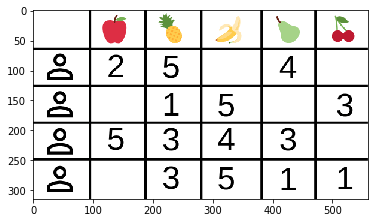

In [2]:
imagen1=mpimg.imread('matriz_recomendacion.png')
imgplot = plt.imshow(imagen1)
plt.show

En esta gráfica meramente educativa tenemos una matriz con usuarios (a la izquierda) y los ítems (arriba). 
En este caso los ítems serán frutas y cada celda contiene la valoración hecha por cada usuario de ese ítem. 
Las casillas vacías significa que el usuario aún no ha probado esa fruta.
Entonces veremos que tenemos "espacios vacios" en la tabla pues evidentemente no todos los usuarios tienen o "valoraron" todos los ítems. 

Por ejemplo si los ítems fueran películas, es evidente que un usuario no habrá visto "todas las películas del mundo"...

Entonces esos espacios son justamente los que con nuestro algoritmo "rellenaremos" para recomendar ítems al usuario.

Una matriz con muchas celdas vacías se dice -en inglés- que es sparce (y suele ser normal) en cambio si tuviéramos la mayoría de las celdas cubiertas con valoraciones, se llamará dense.

# Tipos de Collaborative Filtering

## User-based: (Este es el que veremos a continuación)
Se identifican usuarios similares
Se recomiendan nuevos ítems a otros usuarios basado en el rating dado por otros usuarios similares (que no haya valorado este usuario)

## Item-based:
Calcular la similitud entre items
Encontrar los «mejores items similares» a los que un usuario no tenga evaluados y recomendárselos.

# Predecir gustos (User-based)

Collaborative Filtering intentará encontrar usuarios similares, para ofrecerle ítems "bien valorados" para ese perfil en concreto (lo que antes llamamos "rellenar" en la matriz). Hay diversas maneras de medir ó calcular la similitud entre usuarios y de ello dependerá que se den buenas recomendaciones.

Pero hay que tener en cuenta que estamos hablando de buscar similitud entre "gustos" del usuario sobre esos ítems, me refiero a que no buscaremos perfiles similares por ser del mismo sexo, edad ó nivel educativo. 

Sólo nos valdremos de los ítems que ha experimentado, valorado (y podría ser temporal) para agrupar usuarios parecidos.

Una de las maneras de medir esa similitud se llama distancia por coseno de los vectores y para simplificacion del concepto, crea un espacio vectorial con n dimensiones correspondientes a los n items y sitúa los vectores siendo su medida el "valor rating" de cada usuario -a ese item-. 

Luego calcula el ángulo entre los vectores partiendo de la "coordenada cero". A "poca distancia" entre ángulos, se corresponde con usuarios con mayor similitud.

# Calcular los Ratings

Una vez que tenemos la matriz de similitud, nos valdremos de otra operación matemática para calcular las recomendaciones.

<function matplotlib.pyplot.show(*args, **kw)>

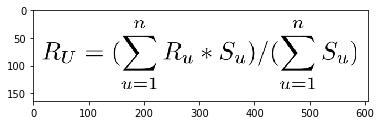

In [3]:
imagen1=mpimg.imread('Formula_matematica.png')
imgplot = plt.imshow(imagen1)
plt.show

Para calcular los ratings faltantes, tendriamos algo así como (Matriz de similitud PROD.VECTORIAL ratings) / (sumatoria de cada fila de ratings)^Transpuesta

Lo que haremos es que cada rating sea multiplicado por el factor de similitud del usuario que dio dicho rating. La predicción final por usuario será igual a la suma del peso de los ratings dividido por la "suma ponderada".

lo veremos en código y no "tiene" tanto truco...

### Que es la suma ponderada?

<function matplotlib.pyplot.show(*args, **kw)>

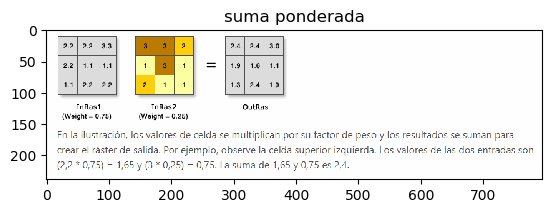

In [25]:
imagen1=mpimg.imread('Suma_ponderada.png')
imgplot = plt.imshow(imagen1)
plt.title('suma ponderada')
plt.show


Todos los valores de entrada se pueden ponderar, o se puede asignar una influencia porcentual a ellos, según su importancia. 

Los pesos pueden ser cualquier valor de punto flotante (incluidos los negativos).

## 1. Cargar datos de entrada

Para esta proyecto se utilizaran los siguientes archivos CSV mediante el uso de pandas.

In [5]:
#Cargamos e iprimimos los 3 archivos de datos csv que utilizaremos:

df_usuarios = pd.read_csv("usuarios.csv")
df_repositorios = pd.read_csv("repositorios.csv")
df_clasificaciones = pd.read_csv("clasificaciones.csv")

In [6]:
df_usuarios.head()

,userId,username,name
0,1,iris9112,Isabel Ruiz Buriticá
1,2,dianaclarke,Diana
2,3,nateprewitt,Nate Prewitt
3,4,oldani,Ordanis Sanchez
4,5,waflessnet,waflessnet


In [7]:
df_repositorios.head()

,repoId,title,categories,stars
0,1,airbnb / javascript,completar,NaN
1,2,kamranahmedse / developer-roadmap,Roadmap to becoming a web developer in 2019,85800.0
2,3,microsoft / vscode,Visual Studio Code,80855.0
3,4,torvalds / linux,Linux kernel source tree,78761.0
4,5,ytdl-org / youtube-dl,Command-line program to download videos from Y...,53909.0


In [8]:
df_clasificaciones.head()

,userId,repoId,rating
0,1,1,2
1,1,2,3
2,1,3,4
3,1,4,5
4,1,5,3


Como se muestra en las tablas, el archivo usuario contiene los clientes de los repositorios los cuales serán tomados como usuarios para el filtro; en el archivo repositorio se encuentran los repositorios valorados por los usuarios, estos serán ítems dentro del filtro. En el archivo clasificaciones, tenemos las ponderaciones que los usuarios le han puesto a los repositorios.

Como para este algoritmo no se cuenta con calificaciones de 1 a 5 estrellas como pondedadores, lo que se realizara es comparar es el número de usuarios que tienen ese mismo repositorio dentro de nuestra base de datos. Estos datos se encuentran en la columna rating.


In [9]:
# Verificamos los números de usuarios mediante la etiqueta userId 
n_usuarios = df_clasificaciones.userId.unique().shape[0]

#Verifiacmo los números de ítems dentro  de la etiqueta repoId
n_items = df_clasificaciones.repoId.unique().shape[0]

print (str(n_usuarios) + ' usuarios')
print (str(n_items) + ' items')

30 usuarios
167 items


Vemos que es un dataset reducido, pequeño. Tenemos 30 usuarios y 167 repositorios valorados.

Clasificacion segun los usuarios


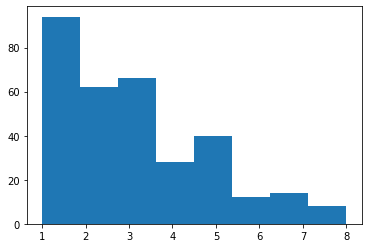

In [10]:
# Se realiza un histograma de las calificaciones de los usuarios a los repositorios
plt.hist(df_clasificaciones.rating,bins=8)
print('Clasificacion segun los usuarios')


Tenemos más de 80 valoraciones con una puntuación de 1 y unas 40 con puntuación en 5. Veamos las cantidades exactas:

In [11]:
# Se agrupan los datos de calificaciones y el número de usuarios
df_clasificaciones.groupby(["rating"])["userId"].count()

rating
1    94
2    62
3    66
4    28
5    40
6    12
7    14
8     8
Name: userId, dtype: int64

Cantidad de repositorios vs usuarios con los mismos


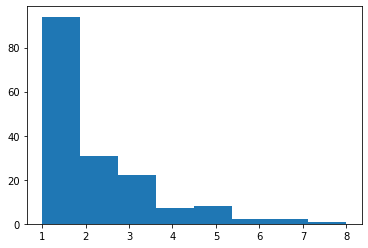

In [12]:
# Realizamos un histograma de repositorios vs uusuarios
plt.hist(df_clasificaciones.groupby(["repoId"])["repoId"].count(),bins=8)
print('Cantidad de repositorios vs usuarios con los mismos')


Aquí vemos la cantidad de repositorios y cuantos usuarios "los tienen". La mayoría de repos los tiene 1 sólo usuario, y no los demás. Hay unos 30 que los tienen 2 usuarios y unos 20 que coinciden 3 usuarios. La suma total debe dar 167.

# User-Based

In [13]:
# Se define la matriz Collaborative Filtering

print('Usuarios/Clasificaciones')
df_matrix = pd.pivot_table(df_clasificaciones, values='rating', index='userId', columns='repoId').fillna(0)
df_matrix


Usuarios/Clasificaciones


repoId,1,2,3,4,5,6,7,8,9,10,...,158,159,160,161,162,163,164,165,166,167
userId,,,,,,,,,,,,,,,,,,,,,
1,2.0,3.0,4.0,5.0,3.0,1.0,5.0,1.0,0.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Sparcity

Es la escasez de datos (también conocida por términos como Sparcity en ingles ) es el término utilizado para describir el fenómeno de no observar suficientes datos en un corpus para modelar con precisión.

In [14]:
# Se toman los valores de la matriz (rating) para evaluarlos
ratings = df_matrix.values

# Se llama a la cadena de valores los cuales no sean cero
sparsity = float(len(ratings.nonzero()[0]))

# Se saca el porcentaje de Sparcity
sparsity /= (ratings.shape[0] * ratings.shape[1])
sparsity *= 100
print('Sparsity: {:4.2f}%'.format(sparsity))

Sparsity: 6.43%


# Dividimos en Train y Test set
Separamos en train y test para -más adelante- poder medir la calidad de nuestras recomendaciones. 

En los problemas de clasificación en donde tenemos que etiquetar por ejemplo entre «spam» o «not spam» ó entre múltiples categorías (coche, barco, avión) solemos encontrar que en nuestro conjunto de datos de entrenamiento contamos con que alguna de las clases de muestra es una clase «minoritaria» es decir, de la cual tenemos muy poquitas muestras. Esto provoca un desbalanceo en los datos que utilizaremos para el entrenamiento de nuestra máquina.

In [15]:
# Se divide los valores (raiting) para las variables de entreanamiento y las de pruebas
calif_train, calif_test = train_test_split(ratings, test_size = 0.2, shuffle=False, random_state=42)
print(calif_train.shape)
print(calif_test.shape)

(24, 167)
(6, 167)


# Matriz de Similitud: Distancias por Coseno
Ahora calculamos en una nueva matriz la similitud entre usuarios.

Matriz de similitud entre los usuarios (distancia del coseno -vectores-).
puede predecir la valoración desconocida de un ítem (i) para un usuario activo u basandonos en la suma ponderada de todas las valoraciones del resto de usuarios para dicho ítem.
Recomendaremos los nuevos ítems a los usuarios según lo establecido en los pasos anteriores.


In [16]:
# Se reakiza una matriz de similitud

sim_matrix = 1 - sklearn.metrics.pairwise.cosine_distances(ratings)
sim_matrix.shape

(30, 30)

Cuanto más cercano a 1, mayor similitud entre esos usuarios.

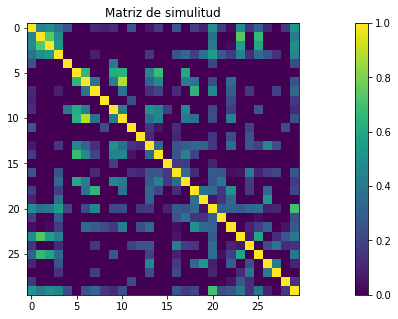

In [17]:
# sim_matrix
plt.rcParams['figure.figsize'] = (20.0, 5.0)
plt.imshow(sim_matrix);
plt.colorbar()
plt.title('Matriz de simulitud')
plt.show()

In [18]:
# Separar las filas y columnas de train y test
sim_matrix_train = sim_matrix[0:24,0:24]
sim_matrix_test = sim_matrix[24:30,24:30]
print(sim_matrix_train.shape)
print(sim_matrix_test.shape)

(24, 24)
(6, 6)


## Predicciones (las recomendaciones!)

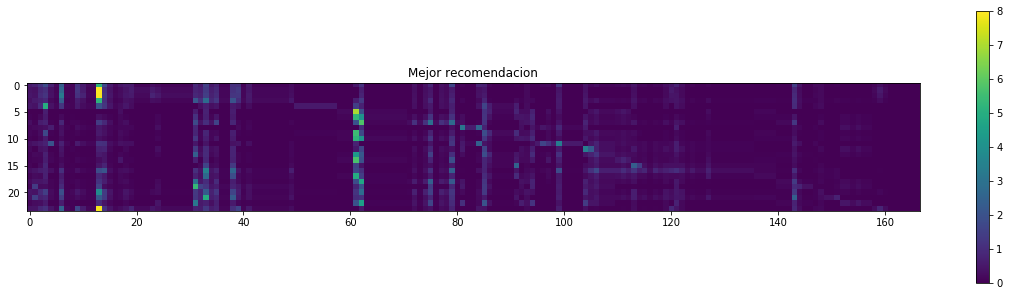

In [19]:
# tipo de dato estructurado que permite almacenar un conjunto de datos homogeneo, 
# es decir, todos ellos del mismo tipo y relacionados.

users_predictions = sim_matrix_train.dot(calif_train) / np.array([np.abs(sim_matrix_train).sum(axis=1)]).T
users_predictions.shape
plt.rcParams['figure.figsize'] = (20.0, 5.0)
plt.imshow(users_predictions);
plt.colorbar()
plt.title('Mejor recomendacion')
plt.show()

Vemos pocas recomendaciones que logren puntuar alto. La mayoría estará entre 1 y 2 puntos. Esto tiene que ver con nuestro dataset pequeño.

### Veamos un ejemplo

In [20]:
USUARIO_EJEMPLO = 'Menyitcj' # debe existir en nuestro dataset de train!
data = df_usuarios[df_usuarios['username'] == USUARIO_EJEMPLO]
usuario_ver = data.iloc[0]['userId'] -1 # resta 1 para obtener el index de pandas
user0=users_predictions.argsort()[usuario_ver]

# Veamos los tres recomendados con mayor puntaje en la predic para este usuario
for i, aRepo in enumerate(user0[-3:]):
    selRepo = df_repositorios[df_repositorios['repoId']==(aRepo+1)]
    print(selRepo['title'] , 'puntaje:', users_predictions[usuario_ver][aRepo])

4    ytdl-org / youtube-dl
Name: title, dtype: object puntaje: 2.061791042203265
84    dipanjanS / practical-machine-learning-with-py...
Name: title, dtype: object puntaje: 2.4496166855518746
99    abhat222 / Data-Science--Cheat-Sheet
Name: title, dtype: object puntaje: 3.362878201910944


# Repo mas popular -sin collaborative filtering-

Esta es la manera básica y sin uso de machine learning de ofrecer recomendaciones. <br>
estas no serán personalizadas, serán iguales para cualquier usuario

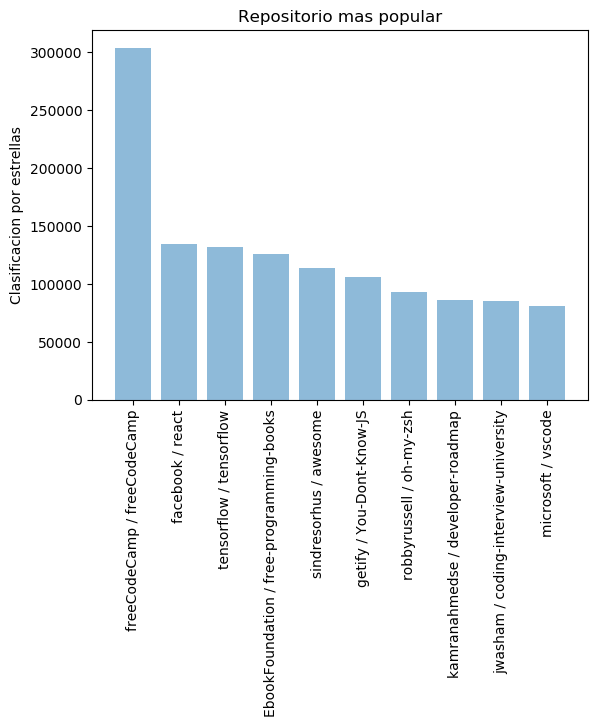

In [21]:
# reset_index () es un método para restablecer el índice de un data set.
# El método reset_index () establece una lista de enteros que van desde 0 a la longitud de los datos como índice.

popular_repo = df_repositorios[['title','stars']].groupby('stars').sum().reset_index()
popular_repo_top_20 = popular_repo.sort_values('stars', ascending=False).head(n=10)

plt.rcdefaults()
 
objects = (list(popular_repo_top_20['title']))
y_pos = np.arange(len(objects))
performance = list(popular_repo_top_20['stars'])
 
plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects, rotation='vertical')
plt.ylabel('Clasificacion por estrellas')
plt.title('Repositorio mas popular')
 
plt.show()
